## DYLEMAT STUDENTA - WYTRAWNE WINO CZY TANIE I OBIAD?
### Wyznaczanie jakości wina na podstawie parametrów cieczy. | Aplikacja dla urzędu kontrolującego winiarnie



Celem projektu jest porównanie w zależności od problemu(regresja/klasyfikacja) różnego rodzaju modeli wraz z różnego rodzaju hiperparametrami.

● https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
 
    
Team members:
- Monika Janicka
- Tomasz Kamiński
- Artur Kłapciński
- Elżbieta Kondracka-Zwolska

1. [BIBLIOTEKI](#BIBLIOTEKI)
2. [DANE_&_WYKRESY](#DANE_&_WYKRESY)
3. [PREPROCESSING](#PREPROCESSING)
4. [MODELE](#MODELE)
4.1 [MODEL1_REGRESJA_LINEARNA](##MODEL1_REGRESJA_LINIOWA)
4.2 [MODEL2_REGRESJA_LOGISTYCZNA](##MODEL2_REGRESJA_LOGISTYCZNA)
4.3 [MODEL3_DECISION_TREE](##MODEL3_DECISION_TREE)
4.4 [MODEL4_RANDOM_FOREST](##MODEL4_RANDOM_FOREST)
4.5 [MODEL5_GBOOST](##MODEL5_XGBOOST)
5. [PORÓWNANIE_MODELI](#PORÓWNANIE_MODELI)

<a id='BIBLIOTEKI'></a>
# 1. BIBLIOTEKI

In [17]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
import math
import sklearn   
import sklearn.datasets as datasets
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler    # Sklearn's preprocessing library  
from sklearn.linear_model import LinearRegression   
from sklearn import preprocessing
import sklearn.metrics
import sklearn.model_selection
from scipy import stats
from sklearn.model_selection import cross_validate, GridSearchCV       # DO WALIDACJI SKROŚNEJ(KRZYŻOWEJ)
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV   # Importing train and test data split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree    # DRZEWO DECYZYJNE
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.classifier import ConfusionMatrix
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score,classification_report
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier # Classifiers
from sklearn.linear_model import LogisticRegression
from mlxtend import plotting
# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

<a id='DANE'></a>
# 2. DANE_&_WYKRESY

In [4]:
df = pd.read_csv("df_rm_z_duplikatami.csv") 
df # display the data frame
df.head(11)

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.9978,0.56,9.4,0
1,0.88,0.00,67.0,0.9968,0.68,9.8,0
2,0.76,0.04,54.0,0.9970,0.65,9.8,0
3,0.28,0.56,60.0,0.9980,0.58,9.8,0
4,0.70,0.00,34.0,0.9978,0.56,9.4,0
5,0.66,0.00,40.0,0.9978,0.56,9.4,0
6,0.60,0.06,59.0,0.9964,0.46,9.4,0
7,0.65,0.00,21.0,0.9946,0.47,10.0,1
8,0.58,0.02,18.0,0.9968,0.57,9.5,1
9,0.50,0.36,102.0,0.9978,0.80,10.5,0


#### Pairplot

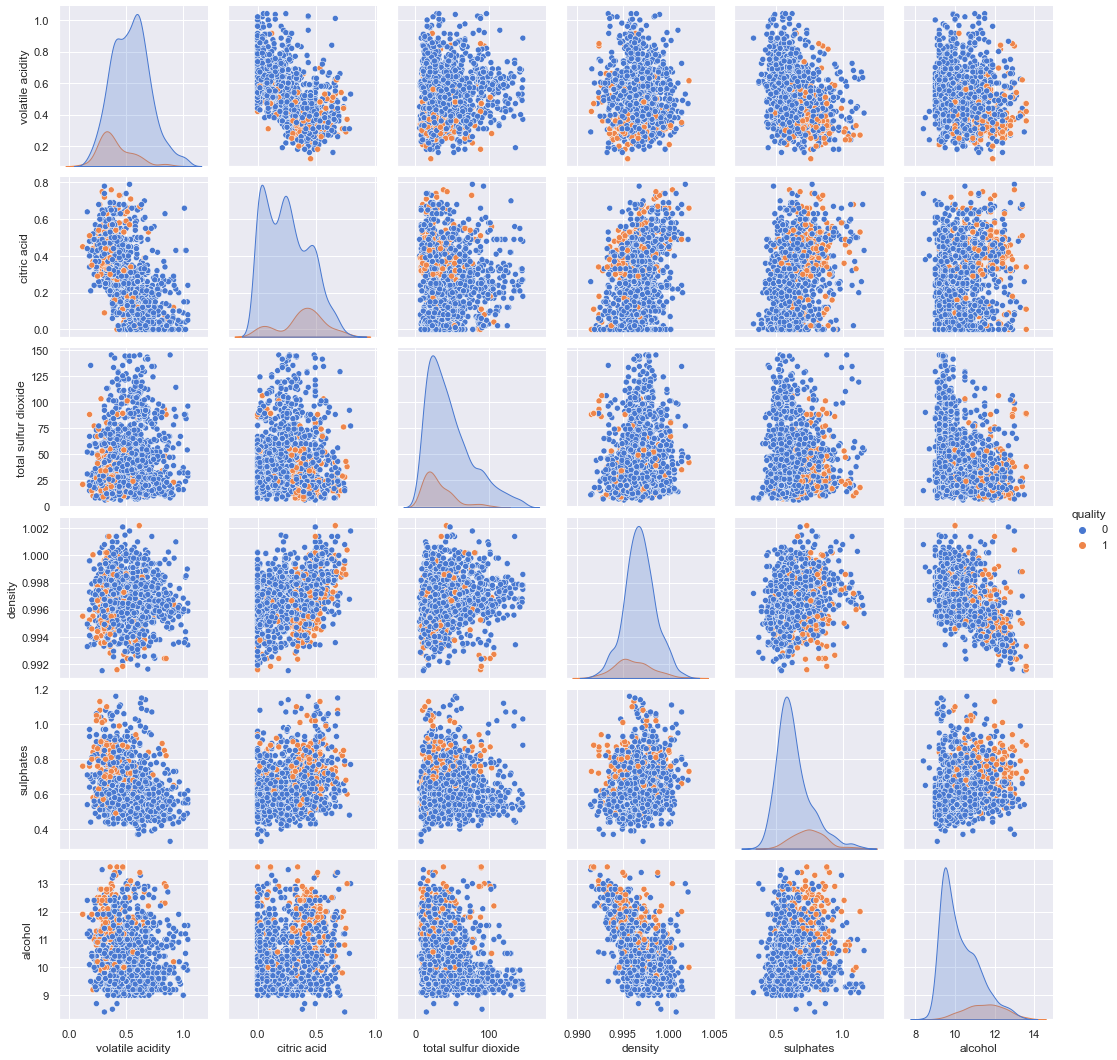

In [7]:
sns.pairplot(df, hue="quality")

#### Boxploty i barploty

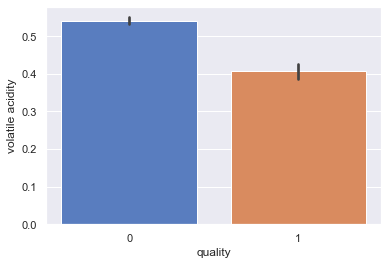

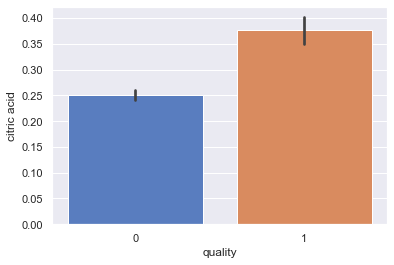

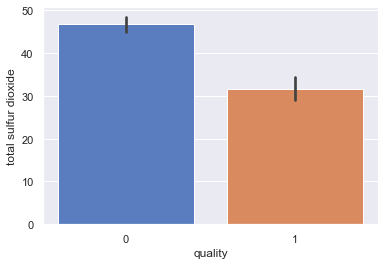

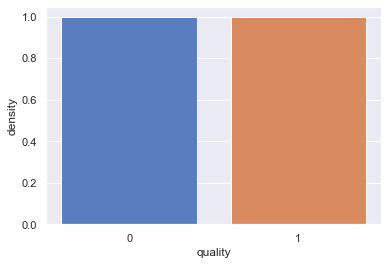

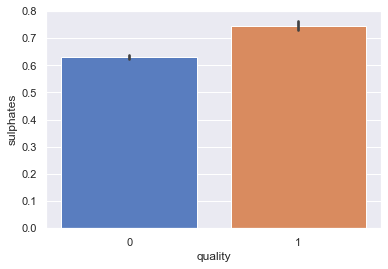

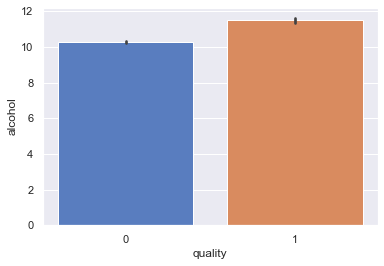

In [5]:
for i in df.columns[:-1]:
    plt.figure()
    sns.barplot(x=df.quality, y=df[i])
    plt.plot()

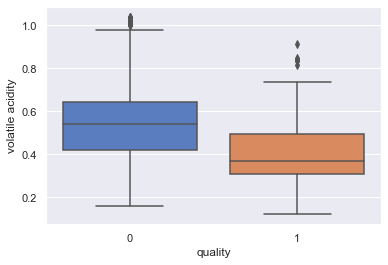

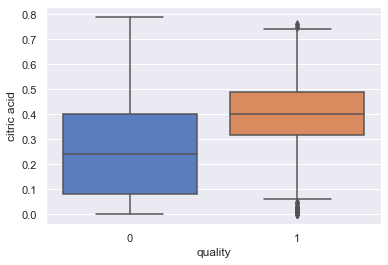

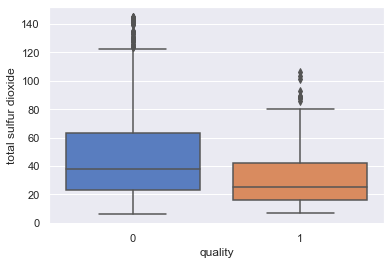

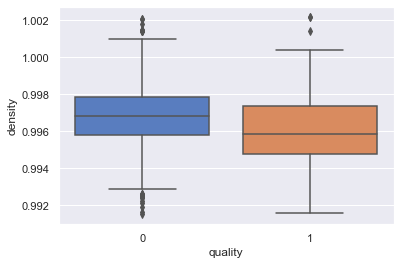

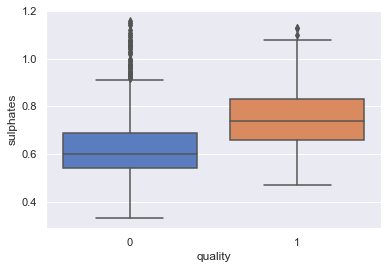

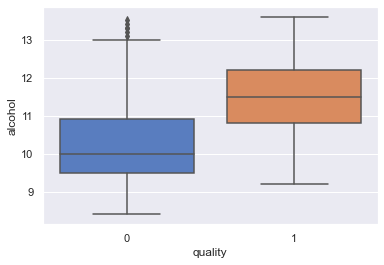

In [6]:
for i in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x=df.quality, y=df[i])
    plt.plot()

<a id='PREPROCESSING'></a>
# 3. PREPROCESSING

<a id='MODELE'></a>
# 4. MODELE

In [9]:
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify = df.quality, random_state=42)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1212, 6)
The shape of X_test is: (304, 6)
The shape of y_train is: (1212,)
The shape of y_test is: (304,)


Text(0.5, 1.0, 'Współrzędne równoległe 6 cech')

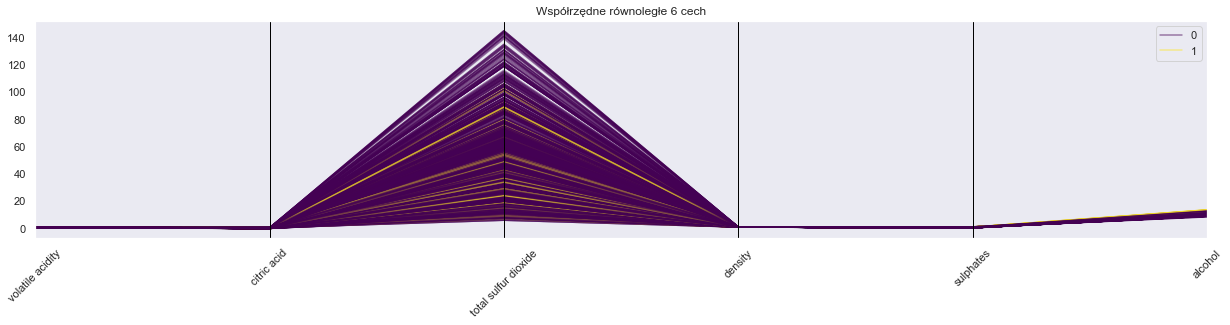

In [12]:
# Wykres współrzędnych równoległych Dla danych wielowymiarowych
from pandas.plotting import ( parallel_coordinates,) 
fig, ax = plt.subplots (figsize=(21, 4))
new_df = X.copy() 
new_df["target"] = y
parallel_coordinates(new_df, "target", ax=ax,colormap="viridis", alpha=0.5,)
ax.set_xticklabels ( ax.get_xticklabels(), rotation=45)

ax.set_title("Współrzędne równoległe 6 cech")

Text(0.5, 1.0, 'Wykres RadViz 8 cech')

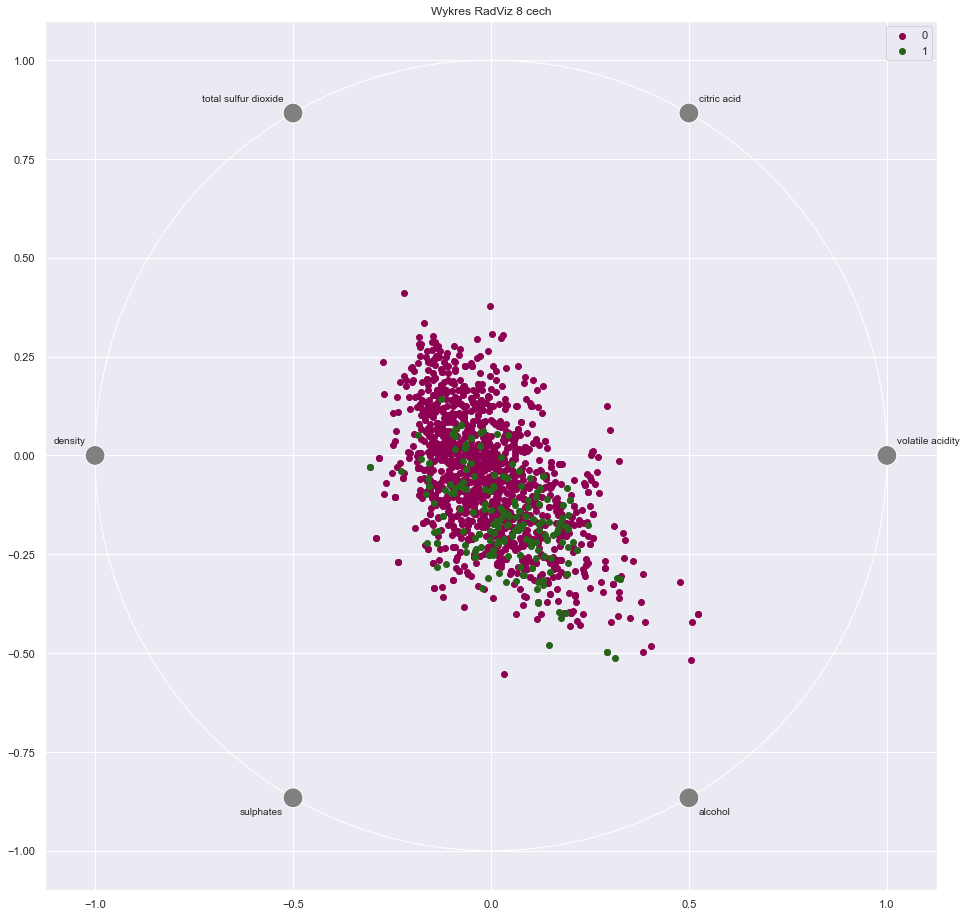

In [13]:
# Wykres ma postać koła w którego wnętrzu znajdują się punkty reprezentujące próbki danych a na obrzeżach cechy. Wartości są znormalizowane. Każdy punkt jest połączony za pomocą sprężyny z cechami do których jest przyciągany. 
# Jest to jeden ze sposobów wizualizowanie odrębności cech
from pandas.plotting import radviz
fig, ax = plt.subplots (figsize=(16, 16))
new_df = X.copy() 
new_df ["target"] = y
radviz(new_df, "target", ax=ax, colormap="PiYG")
ax.set_title("Wykres RadViz 8 cech") 

<a id='MODEL1_REGRESJA_LINEARNA'></a>
## 4.1. MODEL1_REGRESJA_LINIOWA

<a id='MODEL2_REGRESJA_LOGISTYCZNA'></a>
## 4.2. MODEL2_REGRESJA_LOGISTYCZNA

<a id='MODEL3_DECISION_TREE'></a>
## 4.3. MODEL3_DECISION_TREE

In [14]:
dt = DecisionTreeClassifier(
random_state=42, 
max_depth=3,
class_weight=None,
criterion='gini', 
max_features=None, 
max_leaf_nodes=None,
min_impurity_decrease=0.0, 
min_samples_leaf=1, 
min_weight_fraction_leaf=0.0,  
splitter='best')
dt.fit(X_train, y_train) 
    
dt.score (X_test, y_test)

0.8848684210526315

In [15]:
dt.predict_proba (X.iloc[[0]]) 

array([[0.96183206, 0.03816794]])

In [16]:
# Poniżej przedstawiony jest kod wizualizujący ważności cech Giniego (dzięki nim można zmniejszyć błąd modelu):

for col, val in sorted(zip (X.columns, dt.feature_importances_),
key=lambda x: x[1], reverse=True,
)[:5]:
    print(f" {col:10} {val: 10.3f}") 

 alcohol         0.590
 sulphates       0.221
 volatile acidity      0.096
 total sulfur dioxide      0.071
 density         0.021


c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5, 1.0, 'Ważność 6 cech (drzewo decyzyjne)'),
 Text(0.5, 0, 'Względna ważność')]

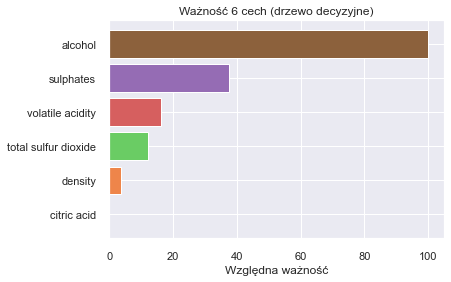

In [18]:
# Wykres ważności cech w odniesieniu do największej bezwzględnej wartości współczynnika regresji. Użyta do tej funkcja wizualizuj sama argument relative= True który powoduje że największej wartość jest przypisywana liczba 
# 100 lub minus 100 a pozostałem wartością proporcjonalnie mniejsze liczby. 
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots (figsize=(6, 4))
fi_viz = FeatureImportances (dt)
fi_viz.fit(X, y)
fi_viz.ax.set(title="Ważność 6 cech (drzewo decyzyjne)", xlabel = "Względna ważność")

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


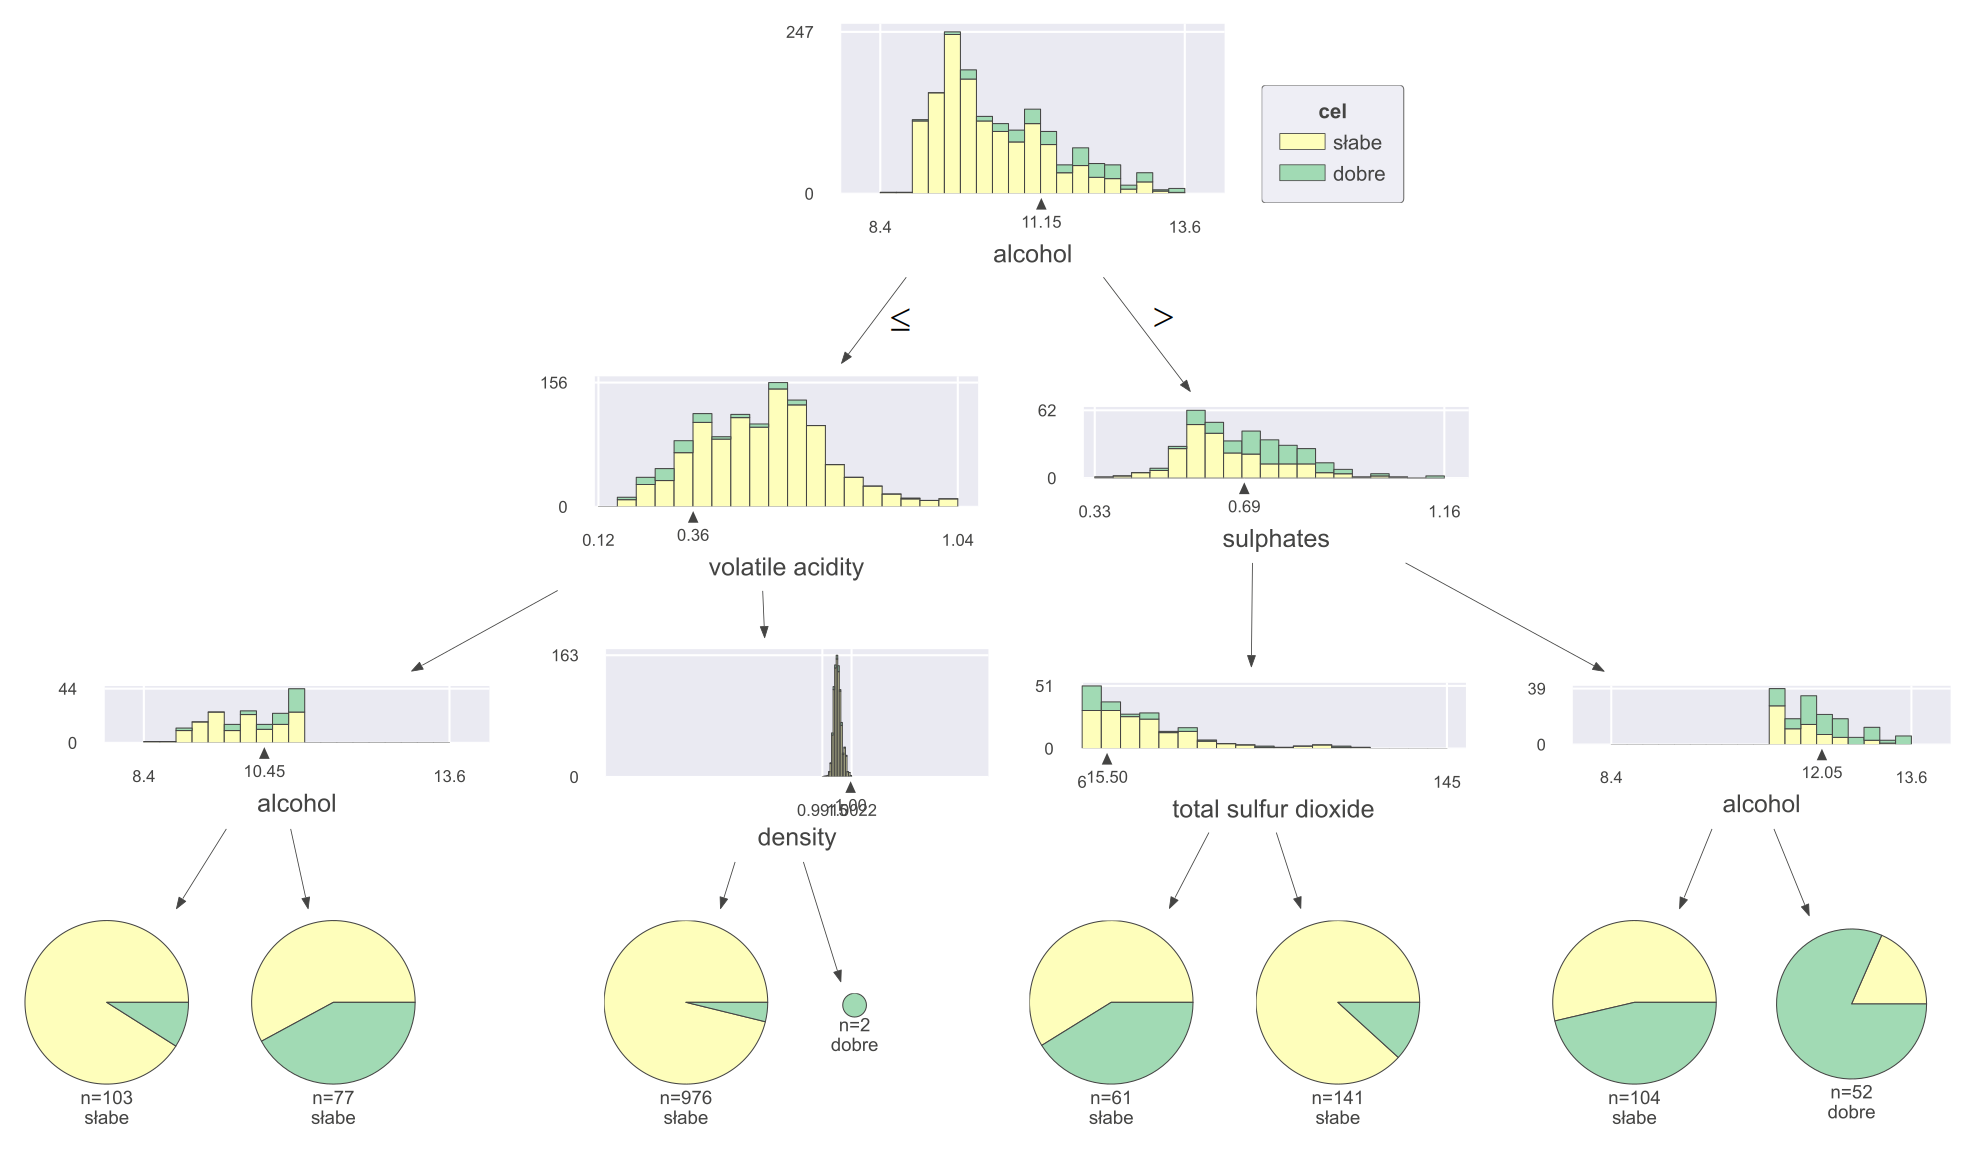

In [19]:
import graphviz.backend as be
from dtreeviz.trees import *
viz = dtreeviz(dt, X,y,target_name="cel",feature_names=X.columns, class_names=["słabe", "dobre"],scale=(2.8))
viz
# viz.save("decision_tree.svg")
#Wykres pokazuje informacje o funkcjonowaniu drzewa. Obraz drzewa z 100 histogramami zawierającymi cenne informacje

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


[Text(0.5, 1.0, 'Tablica pomyłek klasyfikatora drzewa '),
 Text(0.5, 0, 'Klasa prognozowana'),
 Text(0, 0.5, 'Klasa rzeczywista')]

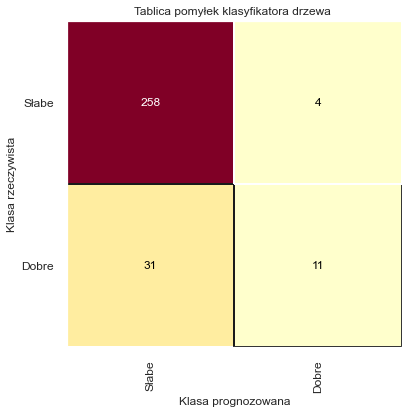

In [20]:
from yellowbrick.classifier import (ConfusionMatrix,)
mapping = {0: "Słabe", 1: "Dobre"} 
fig, ax = plt.subplots (figsize=(6, 6)) 
cm_viz = ConfusionMatrix( dt,classes=["Słabe", "Dobre"], label_encoder=mapping,) 
cm_viz.score (X_test, y_test) 
cm_viz.ax.set(title="Tablica pomyłek klasyfikatora drzewa ", xlabel="Klasa prognozowana", ylabel="Klasa rzeczywista")
# Ćwiartki lewa górna i prawa dolna zawierają poprawne wyniki klasyfikacji, a lewa dolna i prawa górna -błędne; ćwiartka lewa dolna zawiera wyniki fałszywie negatywne 
# a prawa górna - fałszywie pozytywne.  Centrum dobrego klasyfikatora są duże wartości prawdziwych wyników na przekątnej tabeli

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


[Text(0, 0.5, 'SŁABE'), Text(0, 1.5, 'DOBRE')]

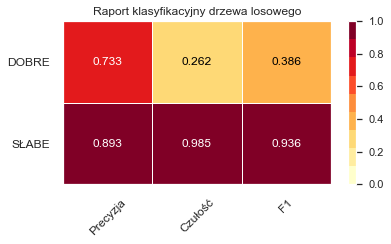

In [21]:
# Raport klasyfikacyjny prezentujący precyzję, czułośc, wskaźnik F1 dla wyników pozytywnych i negatywnych. 
# Im dany wskaźnik jest lepszy -bliższy jedności -tym komórka jest bardziej czerwona
from yellowbrick.classifier import (ClassificationReport,)
fig, ax = plt.subplots (figsize=(6, 3))
cm_viz = ClassificationReport( dt,classes=["SŁABE", "DOBRE"], label_encoder=mapping)

cm_viz.score (X_test, y_test) 
cm_viz.ax.set (title="Raport klasyfikacyjny drzewa losowego")
xlabels = ("Precyzja", "Czułość", "F1")
ax.set_xticks (np.arange(len(xlabels)) + 0.5) 
ax.set_xticklabels (xlabels, rotation=45)
ax.set_yticks (np.arange(len(cm_viz.classes)) + 0.5) 
ax.set_yticklabels (cm_viz.classes) 

0.5077767514532168


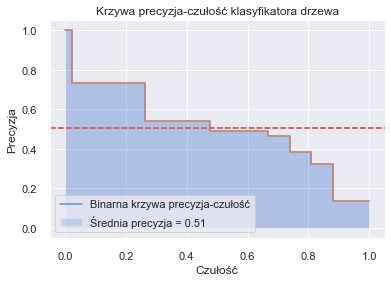

In [23]:
# Krzywa precyzja- czułość
# jeżeli klasy nie są zrównoważone wtedy na podstawie krzywej ROC  można wyciągnąć nadmiernie optymistyczne wnioski. 
# Dlatego stosowany jest inny sposób oceniania klasyfikatora polegające na wykreśleniu krzywej Precision- Recall curve. 
# Klasyfikacja to zrównoważony proces wyszukiwania potrzebnych danych (czułość) przy jednoczesnym ograniczeniu błędnych wyników (precyzja). 
# Zazwyczaj trzeba znaleźć kompromis między tymi pojęciami. Im większa czułość tym mniejsza precyzja i odwrotnie. Kod tworzący wykres precyzja czułość z krzywą

from yellowbrick.classifier import ( PrecisionRecallCurve,)
fig, ax = plt.subplots (figsize=(6, 4))
viz = PrecisionRecallCurve (DecisionTreeClassifier (max_depth=3))

viz. fit (X_train, y_train)
print(viz.score (X_test, y_test)) 
viz.ax.set(title="Krzywa precyzja-czułość klasyfikatora drzewa",xlabel="Czułość", ylabel="Precyzja") 
ax.legend (("Binarna krzywa precyzja-czułość","Średnia precyzja = {:0.2f}".format (viz.score(X_test,y_test))),frameon=True, loc="lower left") 

[Text(0.5, 1.0, 'Równowaga klas dla (:,) próbek'),
 Text(0, 0.5, 'Liczba próbek')]

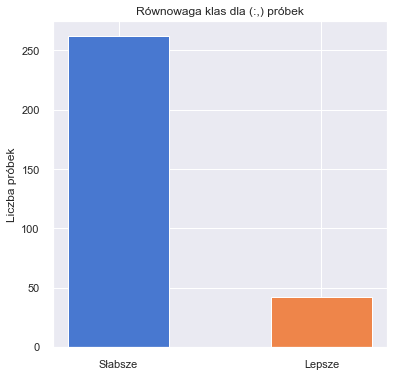

In [24]:
# Równowaga class

# Wykres ilustruje wielkość klas, jeżeli klasy różnią się wielkością wtedy dokładność nie jest odpowiednim wskaźnikiem jakości modelu.  
# Aby zachować właściwe proporcje między klasami danych należy przydzieleniu ich na zbiory treningowy i testowy stosować losowanie warstwowe (parametr stratify)
from yellowbrick.classifier import ClassBalance
fig, ax = plt.subplots (figsize=(6,6))

cb_viz=ClassBalance (labels =["Słabsze", "Lepsze"])
cb_viz.fit(y_test)

ax.set_xticks (np.arange(len(cb_viz.labels))) 
ax.set_xticklabels (cb_viz.labels) 
ax.set(title="Równowaga klas dla (:,) próbek".format(cb_viz.support_.sum()), ylabel="Liczba próbek")
# Na wykresie uzyskano nierównowagę klas

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


[Text(0.5, 1.0, 'Błąd prognozowania klas dla klasyfikatora drzewa losowego'),
 Text(0.5, 0, 'Klasa rzeczywista'),
 Text(0, 0.5, 'Klasa prognozowana')]

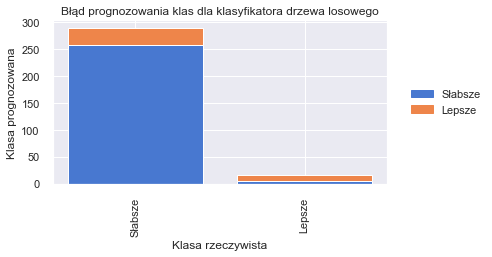

In [25]:
# Błąd prognozowania klas
# wykres błędu prognozowania klas ilustrujący tablicę pomyłek. 

from yellowbrick.classifier import (ClassPredictionError,)

fig, ax = plt.subplots (figsize=(6, 3)) 
cpe_viz = ClassPredictionError(dt, classes=["Słabsze", "Lepsze"])
cpe_viz.score (X_test, y_test)
ax.set_xticks (np.arange(len(cpe_viz.classes))) 
ax.set_xticklabels (cpe_viz.classes)
ax.set(title="Błąd prognozowania klas dla klasyfikatora drzewa losowego", xlabel="Klasa rzeczywista", ylabel="Klasa prognozowana")

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5, 1.0, "Lokalna interpretacja klasy 'lepsze'")]

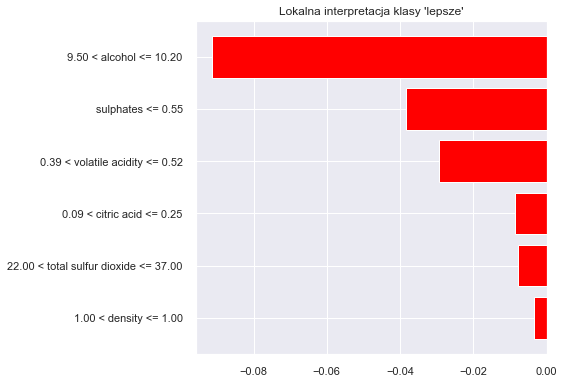

In [26]:
# Analiza LIME  pokazująca, jak poszczególne cechy próbki przesuwają wyniki prognozy w prawo (wybór lepszego gatunku) lub w lewo (słabego gatunku)
# Poniżej przedstawiony jest kod umożliwiający interpretację ostatniej próbki danych ze zbioru treningowego, dla której nasz model drzewa decyzyjnego prognozuje wybór lepszego gatunku:

from lime import lime_tabular 
explainer = lime_tabular. LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=["słabsze", "lepsze"])
exp = explainer.explain_instance( X_train.iloc[-1].values, dt.predict_proba)
# Danymi wejściowymi dla pakietu LIME nie może być struktura DataFrame. Zwróć uwagę, że jest ona zamieniana na tablicę numpy za pomocą atrybutu .values.
fig = exp.as_pyplot_figure() 
fig.tight_layout()
fig.gca().set (title="Lokalna interpretacja klasy '%s'" % exp.class_names [1])

<a id='MODEL4_RANDOM_FOREST'></a>
## 4.4. MODEL4_RANDOM_FOREST

<a id='MODEL5_XGBOOST'></a>
## 4.5. MODEL5_XGBOOST

<a id='PORÓWNANIE_MODELI'></a>
# 5. PORÓWNANIE_MODELI